In [3]:
# Neu laden des Moduls falls es Änderungen gab
import importlib
import src.data.data_check
importlib.reload(src.data.data_check)

from src.data.data_check import check_duplicates, check_corrupted_files

# Pfad zum raw-Verzeichnis
dataset_path = "../data/raw"

# Überprüfung auf Duplikate
duplicates = check_duplicates(dataset_path)
if duplicates:
    print("Duplikate gefunden:")
    for file in duplicates:
        print(file)
else:
    print("Keine Duplikate gefunden.")

# Überprüfung auf beschädigte oder leere Dateien mit paralleler Verarbeitung
corrupted_files = check_corrupted_files(dataset_path, max_workers=8)
if corrupted_files:
    print("\nBeschädigte oder leere Dateien gefunden:")
    for file in corrupted_files:
        print(file)
else:
    print("Keine beschädigten oder leeren Dateien gefunden.")


Keine Duplikate gefunden.
Keine beschädigten oder leeren Dateien gefunden.


In [4]:
importlib.reload(src.data.dataset_creator)
from src.data.dataset_creator import create_dataset

# Pfad zum raw-Verzeichnis
dataset_path = "../data/raw"

# Erstellen und Speichern des Datasets
df = create_dataset(dataset_path, save_path="../data/processed",csv_filename="dataset.csv")

# Ausgabe der ersten Zeilen zur Überprüfung
print(df.head())


AttributeError: module 'src.data' has no attribute 'dataset_creator'

In [2]:
import pandas as pd
from src.data.data_splitter import stratified_split_and_copy_images_by_race

# Laden des vollständigen Datasets
dataset_path = "../data/processed/dataset.csv"
df = pd.read_csv(dataset_path)
print(df.head())

# Aufteilen und Kopieren der Bilder mit einer gleichmäßigen Verteilung nach Rasse
stratified_split_and_copy_images_by_race(df, subset_size=0.1, test_size=0.2)


                                   file_path  age  gender  race
0  ../data/raw/100_1_0_20170110183726390.jpg  100       1     0
1  ../data/raw/100_1_2_20170105174847679.jpg  100       1     2
2  ../data/raw/100_1_2_20170110182836729.jpg  100       1     2
3  ../data/raw/101_1_2_20170105174739309.jpg  101       1     2
4   ../data/raw/10_0_0_20161220222308131.jpg   10       0     0
Verkleinerte, gleichmäßig nach Rasse verteilte Trainingsdaten: 811 Bilder in ../data/processed/train kopiert.
Verkleinerte, gleichmäßig nach Rasse verteilte Testdaten: 203 Bilder in ../data/processed/test kopiert.


Found 811 images belonging to 5 classes.
Found 203 images belonging to 5 classes.


C:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 333ms/step - accuracy: 0.3914 - loss: 1.4631 - val_accuracy: 0.4896 - val_loss: 1.3751
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5312 - loss: 1.4056 - val_accuracy: 0.6364 - val_loss: 1.2098
Epoch 3/20


C:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - accuracy: 0.4868 - loss: 1.3909 - val_accuracy: 0.5104 - val_loss: 1.3085
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3594 - loss: 1.4990 - val_accuracy: 0.2727 - val_loss: 1.8681
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step - accuracy: 0.4848 - loss: 1.4022 - val_accuracy: 0.4948 - val_loss: 1.3456
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5469 - loss: 1.3231 - val_accuracy: 0.5455 - val_loss: 1.2602
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.4774 - loss: 1.3945 - val_accuracy: 0.5000 - val_loss: 1.3247
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 1.2420 - val_accuracy: 0.4545 - val_loss: 1.3518
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.4747 - loss: 1.3861 - val_accuracy: 0.5000 - val_loss: 1.3110
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5156 - loss: 1.2635 - val_accuracy: 0.4545 - val_loss: 1

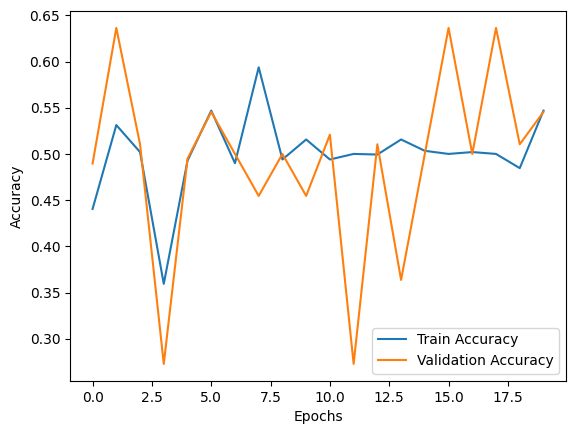

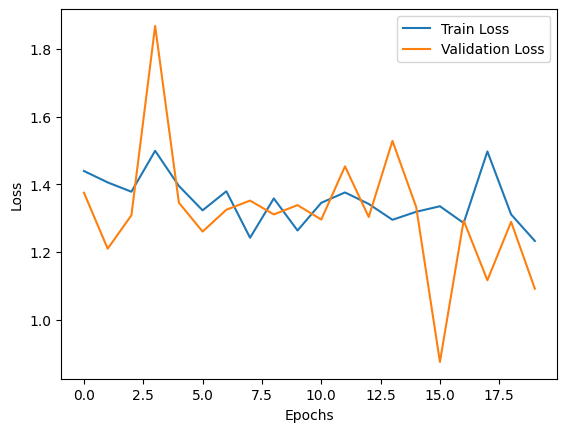

In [9]:
# Importiere die Funktionen aus den src-Modulen
from src.data.data_generator import create_generators
from src.models.cnn_model import build_cnn_model
from src.models.train import compile_and_train, evaluate_model, plot_training_history

# Verzeichnisse für Trainings- und Testbilder
train_dir = '../data/processed/train'
test_dir = '../data/processed/test'

# Daten vorbereiten mit batch_size=32
train_generator, test_generator = create_generators(train_dir, test_dir, batch_size=64)

# CNN-Modell erstellen
model = build_cnn_model(input_shape=(64, 64, 3), num_classes=train_generator.num_classes)

# Modell trainieren
history = compile_and_train(model, train_generator, test_generator, epochs=20)

# Modell evaluieren
evaluate_model(model, test_generator)

# Trainingsergebnisse plotten
plot_training_history(history)


Found 811 images belonging to 5 classes.
Found 203 images belonging to 5 classes.
Epoch 1/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2211 - loss: 1.6503 - val_accuracy: 0.5000 - val_loss: 1.4831
Epoch 2/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.5000 - loss: 1.1113 - val_accuracy: 0.3333 - val_loss: 1.5106
Epoch 3/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4765 - loss: 1.3994 - val_accuracy: 0.4950 - val_loss: 1.4595
Epoch 4/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 79us/step - accuracy: 0.5000 - loss: 1.6425 - val_accuracy: 0.6667 - val_loss: 1.3957
Epoch 5/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4501 - loss: 1.4351 - val_accuracy: 0.5050 - val_loss: 1.4408
Epoch 6/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 92us/step - accuracy: 0.7500 - loss: 0.9478 - val_accuracy: 0.0000e+00 - val_loss: 1.6899
Epoch 7/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.4635 - loss: 1.4513 - val_accuracy: 0.5000 - val_loss: 1.4498
Epoch 8/30

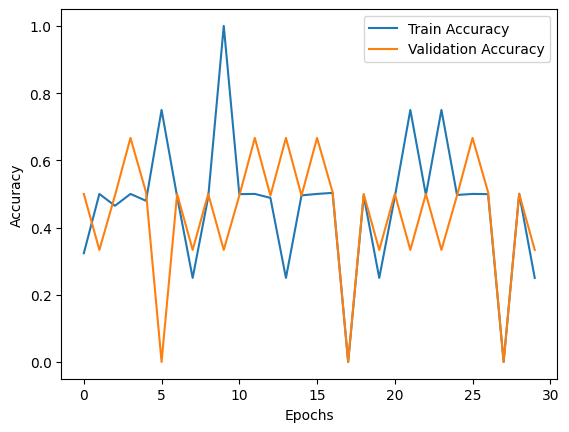

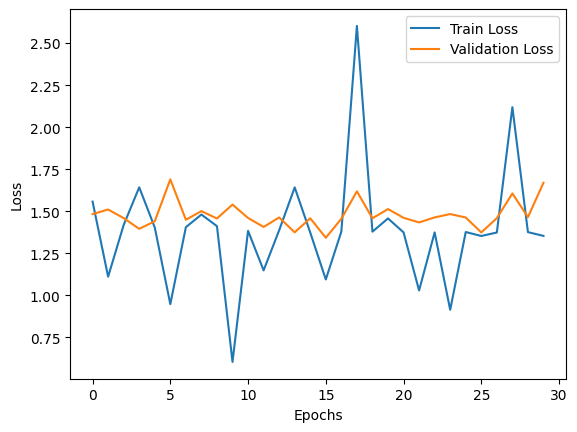

In [14]:
importlib.reload(src.models.train)
from src.data.data_generator import create_generators
from src.models.cnn_model import build_cnn_model
from src.models.train import compile_and_train, evaluate_model, plot_training_history

# Verzeichnisse für Trainings- und Testbilder
train_dir = '../data/processed/train'
test_dir = '../data/processed/test'

# Daten vorbereiten mit batch_size=64
train_generator, test_generator = create_generators(train_dir, test_dir, batch_size=4)

# CNN-Modell erstellen
model = build_cnn_model(input_shape=(64, 64, 3), num_classes=train_generator.num_classes)

# Modell trainieren
history = compile_and_train(model, train_generator, test_generator, epochs=30, learning_rate=0.00001)

# Modell evaluieren
evaluate_model(model, test_generator)

# Trainingsergebnisse plotten
plot_training_history(history)


Found 811 images belonging to 5 classes.
Found 203 images belonging to 5 classes.


C:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
201/202 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3968 - loss: 1.4851

C:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


202/202 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.3974 - loss: 1.4847 - val_accuracy: 0.4950 - val_loss: 1.4933
Epoch 2/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.7500 - loss: 1.6585 - val_accuracy: 0.6667 - val_loss: 1.3976
Epoch 3/30
  1/202 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.5000 - loss: 1.7126

C:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.5070 - loss: 1.3912 - val_accuracy: 0.5000 - val_loss: 1.4937
Epoch 4/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 104us/step - accuracy: 0.0000e+00 - loss: 1.7813 - val_accuracy: 0.3333 - val_loss: 1.5274
Epoch 5/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.5242 - loss: 1.3449 - val_accuracy: 0.5000 - val_loss: 1.4990
Epoch 6/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 147us/step - accuracy: 0.0000e+00 - loss: 1.6248 - val_accuracy: 0.3333 - val_loss: 1.5384
Epoch 7/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.4981 - loss: 1.3710 - val_accuracy: 0.5000 - val_loss: 1.4916
Epoch 8/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 112us/step - accuracy: 0.2500 - loss: 1.8347 - val_accuracy: 0.3333 - val_loss: 1.6199
Epoch 9/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.4591 - loss: 1.3986 - val_accuracy: 0.4900 - val_loss: 1.4887
Epoch 10/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 110us/step - accuracy: 0.5000 - loss: 1.1970 - val_ac

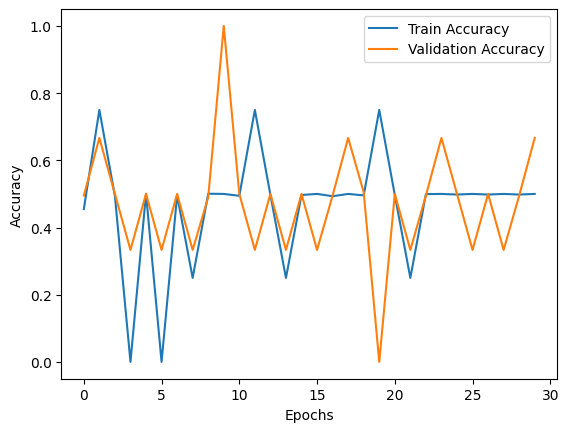

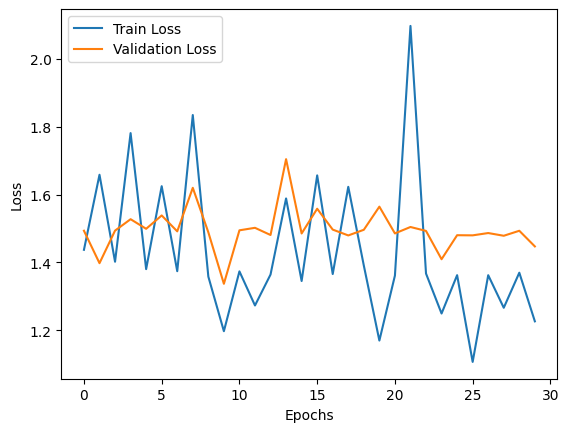

In [5]:
# Importiere die Funktionen aus den src-Modulen
import importlib
import src.models.train
importlib.reload(src.models.train)

from src.data.data_generator import create_generators
from src.models.cnn_model2 import build_cnn_model  # Importiere das neue Modell cnn_model2
# das neue Modell hat mehr Filter und Dropout-Schichten
from src.models.train import compile_and_train, evaluate_model, plot_training_history

# Verzeichnisse für Trainings- und Testbilder
train_dir = '../data/processed/train'
test_dir = '../data/processed/test'

# Daten vorbereiten mit batch_size=4 (kann bei Bedarf angepasst werden)
train_generator, test_generator = create_generators(train_dir, test_dir, batch_size=4)

# CNN-Modell erstellen
model = build_cnn_model(input_shape=(64, 64, 3), num_classes=train_generator.num_classes)

# Modell trainieren
history = compile_and_train(model, train_generator, test_generator, epochs=30, learning_rate=0.00001)

# Modell evaluieren
evaluate_model(model, test_generator)

# Trainingsergebnisse plotten
plot_training_history(history)


## Verstärkung der Daten durch Data Augmentation

Found 811 images belonging to 5 classes.
Found 203 images belonging to 5 classes.
Epoch 1/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.4428 - loss: 1.4792 - val_accuracy: 0.4950 - val_loss: 1.4811
Epoch 2/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - accuracy: 0.0000e+00 - loss: 2.1463 - val_accuracy: 0.6667 - val_loss: 1.5163
Epoch 3/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.5028 - loss: 1.3724 - val_accuracy: 0.5000 - val_loss: 1.4795
Epoch 4/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 90us/step - accuracy: 0.7500 - loss: 1.2875 - val_accuracy: 0.3333 - val_loss: 1.5790
Epoch 5/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.4802 - loss: 1.4058 - val_accuracy: 0.4950 - val_loss: 1.4781
Epoch 6/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 93us/step - accuracy: 0.0000e+00 - loss: 2.5583 - val_accuracy: 0.6667 - val_loss: 1.3711
Epoch 7/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.4832 - loss: 1.3941 - val_accuracy: 0.4950 - val_loss: 1.4783
Epoch

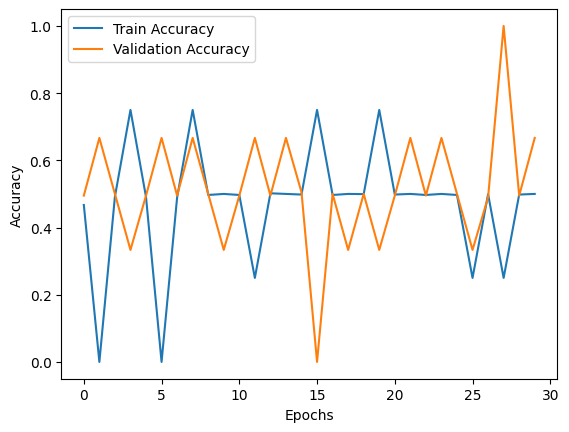

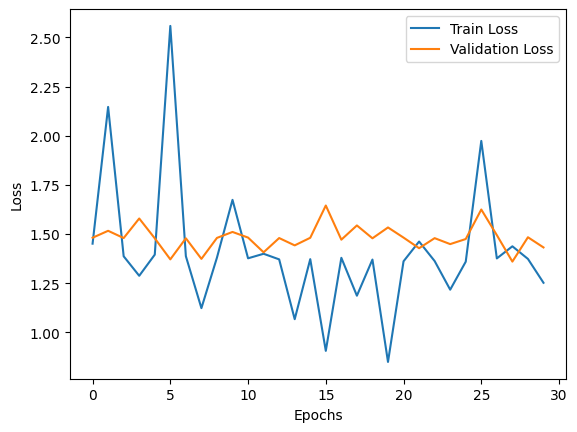

In [6]:
# Importiere die Funktionen aus den src-Modulen
import importlib
import src.models.train
importlib.reload(src.models.train)

from src.data.data_generator import create_generators
from src.models.cnn_model2 import build_cnn_model  # Importiere das neue Modell cnn_model2
# das neue Modell hat mehr Filter und Dropout-Schichten
from src.models.train import compile_and_train, evaluate_model, plot_training_history

# Verzeichnisse für Trainings- und Testbilder
train_dir = '../data/processed/train'
test_dir = '../data/processed/test'

# Daten vorbereiten mit batch_size=4 (kann bei Bedarf angepasst werden)
train_generator, test_generator = create_generators(train_dir, test_dir, batch_size=4)

# CNN-Modell erstellen
model = build_cnn_model(input_shape=(64, 64, 3), num_classes=train_generator.num_classes)

# Modell trainieren
history = compile_and_train(model, train_generator, test_generator, epochs=30, learning_rate=0.00001)

# Modell evaluieren
evaluate_model(model, test_generator)

# Trainingsergebnisse plotten
plot_training_history(history)
